#### Metrices of Classification Algorithms 

__Confusion Matrix__

__Accuarcy Score__

__Classification Report__ `Precision, Rcall and f1-score`

__K-NN__ - ``Movie Recommandation``

__K-Means__ - ``Un-supervised Machine Learning``

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 12, 5
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.datasets import make_classification

In [52]:
X, y = make_classification()

In [53]:
X = X[:, :2]

In [54]:
X.shape

(100, 2)

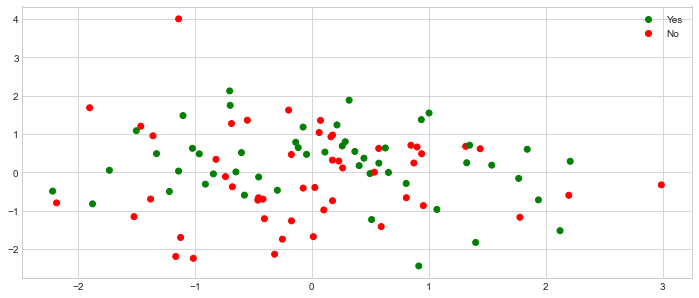

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda value: 'red' if value else 'green', y)))
plt.plot([], [], 'go', label='Yes')
plt.plot([], [], 'ro', label='No')
plt.legend()
plt.show()

`V` is our obervation point or we can real data which we want to classify

$v_i$ is the $i^{th}$ value of our training data

V(x, y)

$vi(x_i, y_i)$

$$ d_i \quad = \quad \sqrt {  {(x-x_i)^2}+ {(y-y_i)^2} } $$ 

In [56]:
def distance(v1, v2):
    x1,y1 = v1
    x2,y2 = v2
    d = np.sqrt( ( ( ( x2 - x1 ) **2 ) + ( ( y2 - y1 ) ** 2 ) ) )
    return d

In [57]:
distance([1, 5], [6, 3])

5.385164807134504

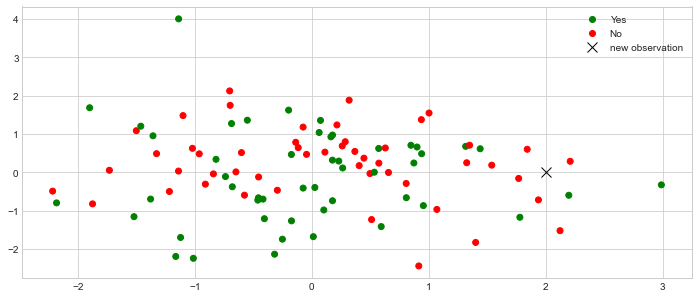

In [80]:
V = [ 2, 0]
plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda value: 'green' if value else 'red', y)))
plt.plot([], [], 'go', label='Yes')
plt.plot([], [], 'ro', label='No')
plt.plot(V[0], V[1], 'kx', ms=10, label='new observation')
plt.legend()
plt.show()

In [61]:
X.shape

(100, 2)

In [81]:
def get_kneighbours(X_train, y_train, ob, k = 5):
    neighbours = []
    for v,c in zip(X_train, y_train):
        neighbours.append((distance(V,v), c))
    neighbours.sort()
    return neighbours[:k]


In [82]:
print(*get_kneighbours(X, y, V, k=13), sep='\n')

(0.2788983999658856, 0)
(0.35809939147876363, 0)
(0.4990917975160401, 0)
(0.6248958499328043, 0)
(0.6273421348424906, 1)
(0.7182207536511848, 0)
(0.7211616749515397, 0)
(0.8340778369286879, 1)
(0.9636566302105092, 0)
(0.9652140380607069, 1)
(1.0406549062183277, 1)
(1.1539038085858153, 1)
(1.1676912295187838, 1)


In [109]:
def predict(X, y, V, map_dict= None, k=5):# 0 - no, 1 - yes
    neighbours = get_kneighbours(X, y, V, k)
    d = {}
    for dis, c in neighbours:
        if c in d:
            d[c] += 1
        else:
            d[c] = 1
    values = list(d.items())
    values.sort(key=lambda x:x[1], reverse=True)
    if map_dict:
        cls =  map_dict[values[0][0]]
    else:
        cls = values[0][0]
    return cls

In [110]:
map_dict = { 0:'no', 1:'yes'}

In [111]:
predict(X, y, V, map_dict, k=13)

'no'

In [112]:
predict(X, y, V, k=13)

0

In [127]:
predict(X, y, V, map_dict, k=13)

'no'

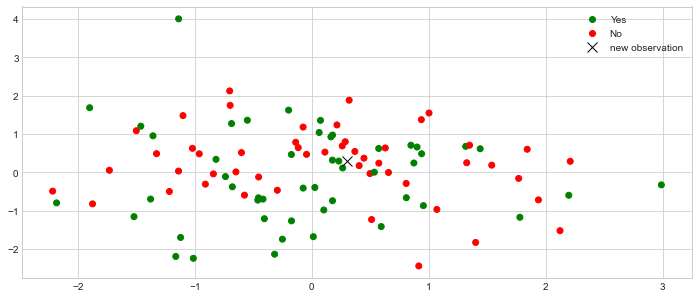

In [121]:
V = [ 0.3, 0.3]
plt.scatter(X[:, 0], X[:, 1], c=list(map(lambda value: 'green' if value else 'red', y)))
plt.plot([], [], 'go', label='Yes')
plt.plot([], [], 'ro', label='No')
plt.plot(V[0], V[1], 'kx', ms=10, label='new observation')
plt.legend()
plt.show()

In [128]:
iris = sns.load_dataset('iris')

In [129]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [131]:
features = iris.drop('species', axis=1)

In [132]:
target = iris.species

In [133]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [134]:
target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

__train test split__

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [137]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
31,5.4,3.4,1.5,0.4
29,4.7,3.2,1.6,0.2
59,5.2,2.7,3.9,1.4
147,6.5,3.0,5.2,2.0


In [138]:
y_train.head()

15         setosa
31         setosa
29         setosa
59     versicolor
147     virginica
Name: species, dtype: object

In [173]:
v1 = np.array( [1, 2, 3, 4])
v2 = np.array([4, 5, 3, 5])

In [174]:
v1

array([1, 2, 3, 4])

In [175]:
v2

array([4, 5, 3, 5])

In [176]:
v2 - v1

array([3, 3, 0, 1])

In [179]:
np.sqrt(((v2 - v1 )**2 ).sum())

4.358898943540674

In [180]:
def distance(v1, v2):
    return np.sqrt(((v2 - v1 )**2 ).sum())

In [181]:
def get_kneighbours(X_train, y_train, ob, k = 5):
    neighbours = []
    for v,c in zip(X_train.values, y_train.values):
        neighbours.append((distance(ob, v), c))
    neighbours.sort()
    return neighbours[:k]


In [182]:
def predict(X_train, y_train, X_test, map_dict= None, k=5):# 0 - no, 1 - yes
    pred = []
    for point in X_test.values:
        neighbours = get_kneighbours(X_train, y_train, point, k)
        d = {}
        for dis, c in neighbours:
            if c in d:
                d[c] += 1
            else:
                d[c] = 1
        values = list(d.items())
        values.sort(key=lambda x:x[1], reverse=True)
        if map_dict:
            cls =  map_dict[values[0][0]]
        else:
            cls = values[0][0]
        pred.append(cls)
    return pred

In [221]:
y_pred = predict(X_train, y_train, X_test, k =9)

In [222]:
y_pred[:5]

['virginica', 'versicolor', 'virginica', 'setosa', 'versicolor']

In [223]:
y_test[:5].to_numpy()

array(['virginica', 'versicolor', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [226]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [227]:
print(confusion_matrix(y_test, y_pred))


[[11  0  0]
 [ 0 12  1]
 [ 0  0 14]]


In [230]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}")

Accuracy: 97.37


In [231]:

print("Classification Report ")
print(classification_report(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



In [232]:
from sklearn.neighbors import KNeighborsClassifier

In [252]:
model = KNeighborsClassifier(n_neighbors=9)

In [253]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [254]:
pred = model.predict(X_test)

In [255]:
pred[:5]

array(['virginica', 'versicolor', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [256]:
print("Confusion: \n\n",confusion_matrix(y_test, pred))

Confusion: 

 [[11  0  0]
 [ 0 12  1]
 [ 0  0 14]]


In [258]:
print(f"Accuracy: {accuracy_score(y_test, pred)*100:.2f}")

Accuracy: 97.37


In [259]:
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



In [261]:
!ls ml-100k/

README
allbut.pl
mku.sh
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test


In [262]:
!head ml-100k/u.data

0	50	5	881250949
0	172	5	881250949
0	133	1	881250949
196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488


In [263]:
import time

In [264]:
time.ctime(881250949)

'Thu Dec  4 21:25:49 1997'

In [265]:
# userid, movieid, rating, timestamp

In [290]:
data = pd.read_csv('ml-100k/u.data', sep='\t', header=None,
                   names=['userid', 'movieid', 'rating'], usecols=[0, 1, 2])

In [291]:
data.head()

,userid,movieid,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [293]:
rating = data.copy()

In [277]:
rating.head()

,userid,movieid,rating
0,50,5,881250949
0,172,5,881250949
0,133,1,881250949
196,242,3,881250949
186,302,3,891717742


In [278]:
!head ml-100k/u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [279]:
names = [ 'movieid', 'movietitle', 'Action',
        'Adventure', 'Animation', 'Children\'s',
        'Comedy', 'Crime', 'Documentary', 'Drama',
        'Fantasy', 'Film-Noir', 'Horror', 'Musical',
        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
        'Western']
cols = [ 0, 1,] + list(range(6, 24))

In [283]:
movies = pd.read_csv('ml-100k/u.item',
                sep='|',
                usecols=cols,
                names=names,
                encoding='latin1')

In [284]:
movies.head()

,movieid,movietitle,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


    We can make a recommandation engine using this data

In [295]:
rating.head()

,userid,movieid,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


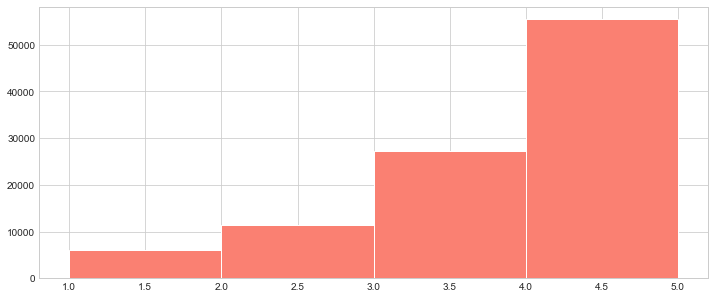

In [296]:
plt.hist(rating['rating'], ec='w', color='salmon', bins=4)
plt.show()

### EDA

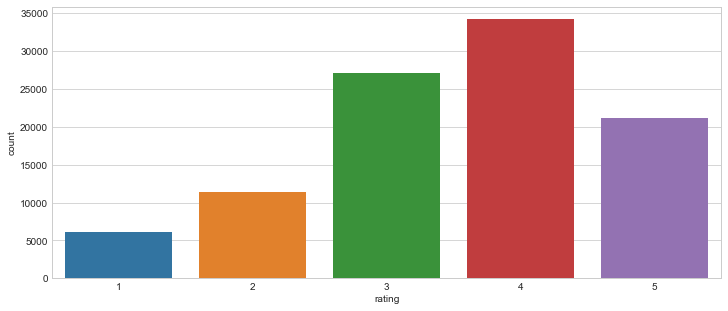

In [298]:
sns.countplot(rating['rating'])
plt.show()

In [299]:
rating.head()

,userid,movieid,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [302]:
movies[movies['movieid']==50]

,movieid,movietitle,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
49,50,Star Wars (1977),1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


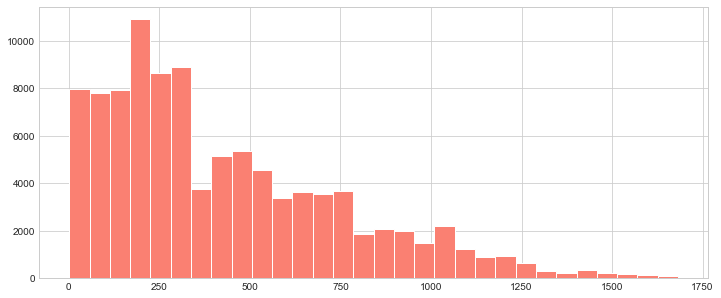

In [303]:
plt.hist(rating['movieid'], ec='w', color='salmon', bins=30)
plt.show()

### Most 20 highest Viewed Movies

In [306]:
pm = rating['movieid'].value_counts()[:20]

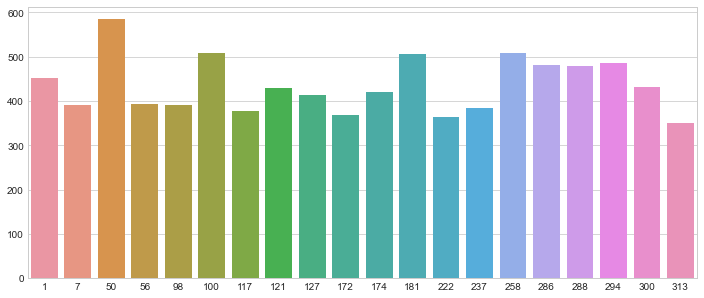

In [313]:
sns.barplot(pm.index, pm.values)
plt.show()

In [320]:
most_view = movies[movies['movieid'].isin(pm.index)][['movieid', 'movietitle']]

In [337]:
most_view.head()

,movieid,movietitle
0,1,Toy Story (1995)
6,7,Twelve Monkeys (1995)
49,50,Star Wars (1977)
55,56,Pulp Fiction (1994)
97,98,"Silence of the Lambs, The (1991)"


In [339]:
ndf = pd.DataFrame({
    'movieid': pm.index, 
    'freq': pm.values
})

In [340]:
ndf.head()

,movieid,freq
0,50,584
1,258,509
2,100,508
3,181,507
4,294,485


In [342]:
most_view = pd.merge(ndf, most_view)

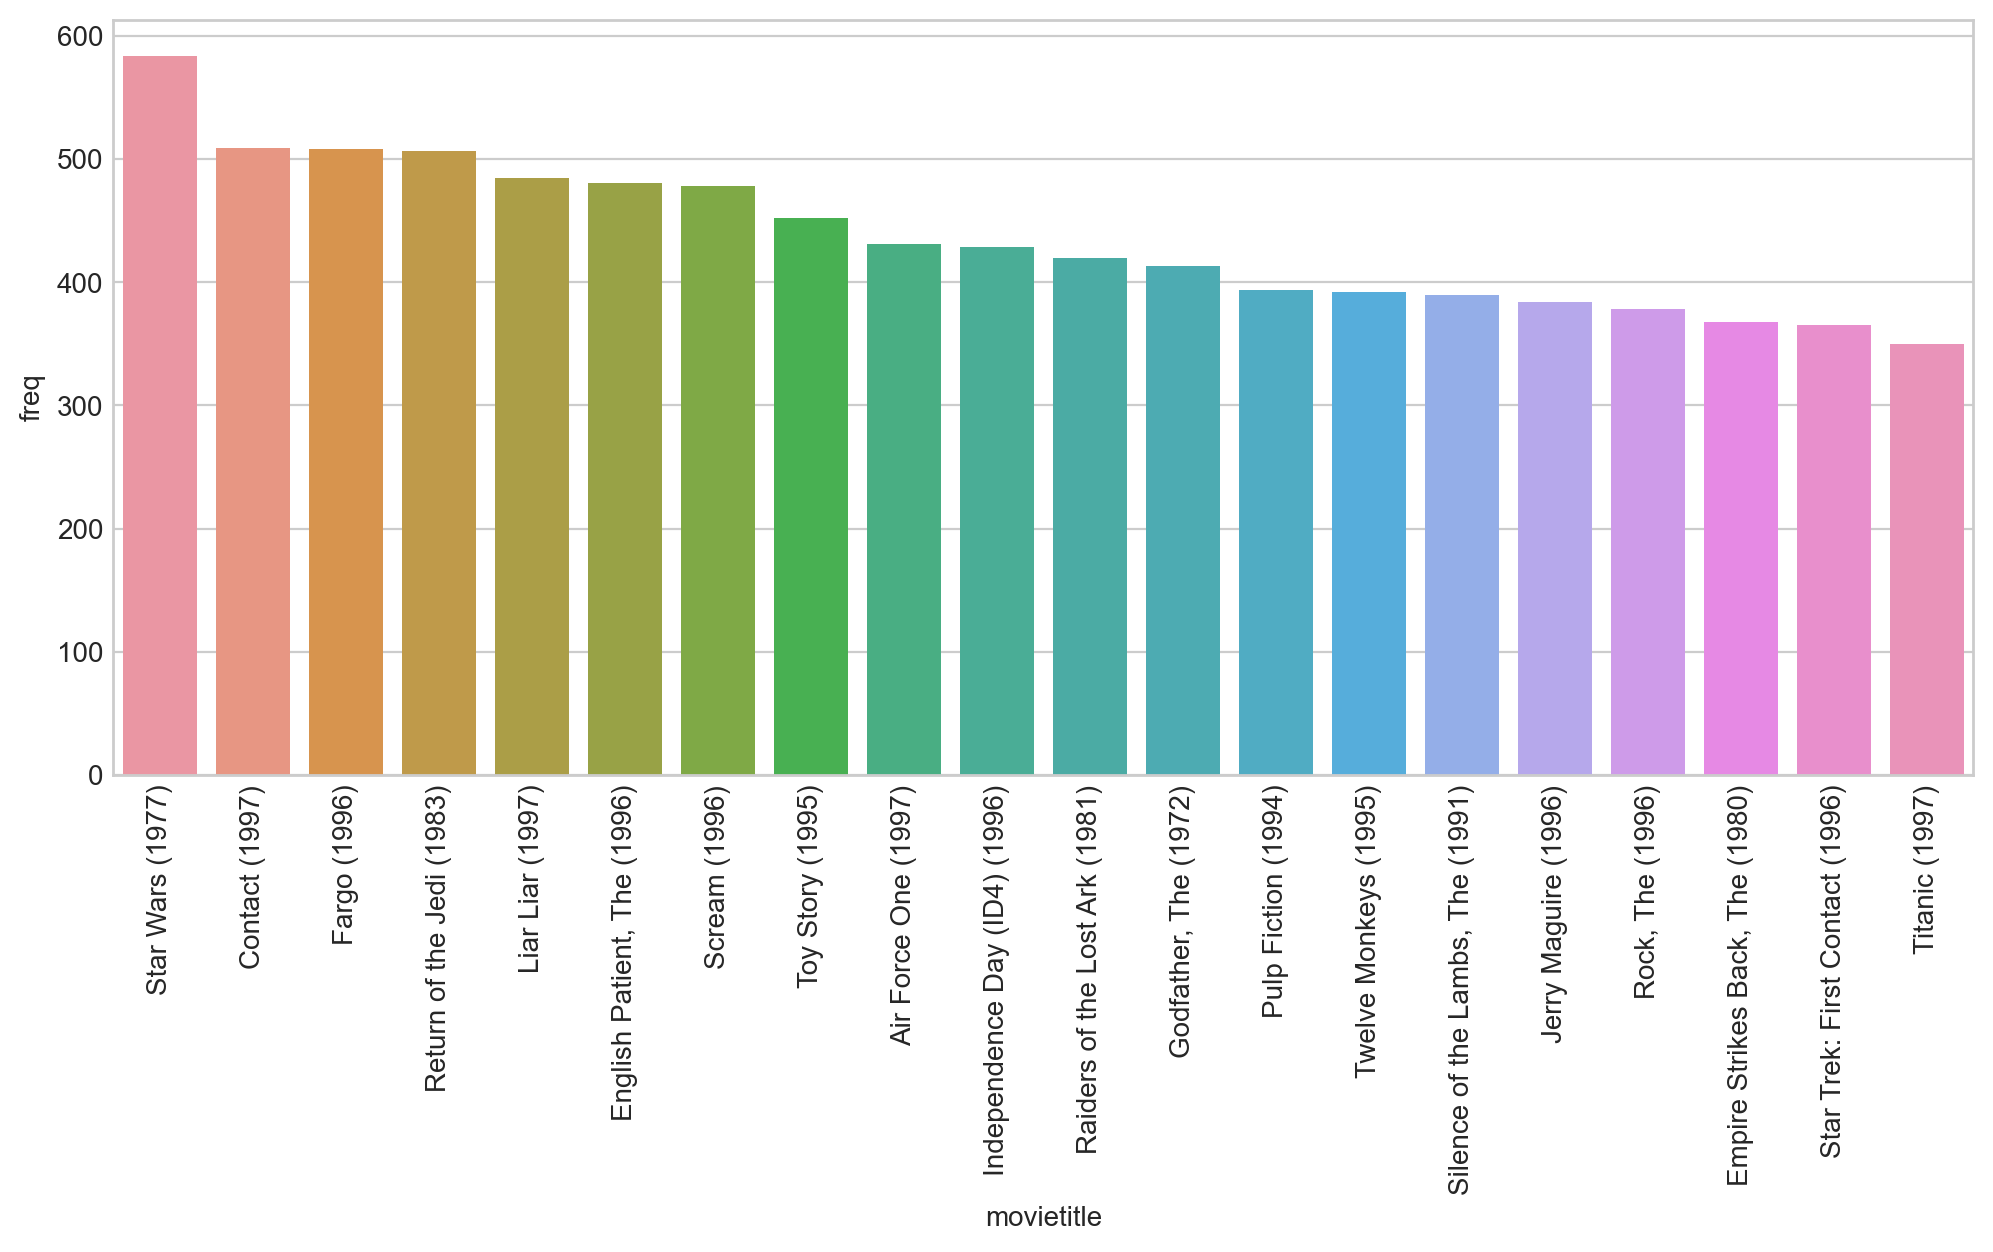

In [344]:
plt.figure(figsize=(12, 5), dpi=200)
sns.barplot(most_view.movietitle, most_view.freq)
plt.xticks(rotation=90)
plt.show()

    we will recommand a movie on the basis of geners, avg rating

In [ ]:
'Godfather, The(1972)'

In [345]:
rating.shape

(100003, 3)

In [346]:
movies.shape

(1682, 20)

In [348]:
rating.head()

,userid,movieid,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [350]:
movie_rating = rating.groupby('movieid').agg({
    'rating': np.mean,
    'userid': np.size
})

In [351]:
movie_rating.shape

(1682, 2)

In [352]:
movies.shape

(1682, 20)

In [354]:
movie_rating.describe()

,rating,userid
count,1682.000000,1682.000000
mean,3.076037,59.454816
std,0.781654,80.390832
min,1.000000,1.000000
25%,2.659600,6.000000
50%,3.161528,27.000000
75%,3.653428,80.000000
max,5.000000,584.000000


,movietitle,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,
50,Star Wars (1977),1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
51,Legends of the Fall (1994),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1


In [383]:
movie_name = movies.set_index('movieid')['movietitle']

In [384]:
pd.set_option('display.max_colwidth', -1)

In [385]:
movie_name.head()

movieid
1    Toy Story (1995) 
2    GoldenEye (1995) 
3    Four Rooms (1995)
4    Get Shorty (1995)
5    Copycat (1995)   
Name: movietitle, dtype: object

In [391]:
movie_name[50]

'Star Wars (1977)'

In [389]:
movie_id = movies.set_index('movietitle')['movieid']

In [392]:
movie_id['Star Wars (1977)']

50

In [393]:
movies.head()

,movieid,movietitle,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [394]:
movie_rating.head()

,rating,userid
movieid,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


In [395]:
movie_rating['movieid'] = movie_rating.index

In [399]:
movie_rating.head()

,rating,userid,movieid
movieid,,,
1,3.878319,452,1
2,3.206107,131,2
3,3.033333,90,3
4,3.550239,209,4
5,3.302326,86,5


In [402]:
newdf = movies.set_index('movieid')

In [407]:
movie_features = pd.merge(movie_rating, newdf, left_index=True, right_index=True)

In [408]:
movie_features.head()

,rating,userid,movieid,movietitle,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,,,
1,3.878319,452,1,Toy Story (1995),0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.206107,131,2,GoldenEye (1995),1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3.033333,90,3,Four Rooms (1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.550239,209,4,Get Shorty (1995),1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,3.302326,86,5,Copycat (1995),0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [409]:
movie_features.loc[50:51]

,rating,userid,movieid,movietitle,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,,,
50,4.359589,584,50,Star Wars (1977),1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
51,3.456790,81,51,Legends of the Fall (1994),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [410]:
rating.loc[50]

userid     249
movieid    241
rating     5  
Name: 50, dtype: int64

In [411]:
features = movie_features.drop(['movieid', 'movietitle'], axis=1)

In [412]:
features.columns

Index(['rating', 'userid', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [413]:
features['userid'].describe()

count    1682.000000
mean     59.454816  
std      80.390832  
min      1.000000   
25%      6.000000   
50%      27.000000  
75%      80.000000  
max      584.000000 
Name: userid, dtype: float64

In [418]:
final = features[features['userid'] > 20]

In [419]:
final.head()

,rating,userid,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,,
1,3.878319,452,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.206107,131,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.033333,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.550239,209,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,3.302326,86,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


$$\text {normalizaing coeff of } x_i \quad = \quad \frac {(x_i - min(X)} {(max(X)-min(X))} $$

In [424]:
mx = final['userid'].max()
mi = final['userid'].min()
final['userid'] = final['userid'].apply(lambda value: (value-mi)/(mx-mi) )

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [431]:
final.rename({'userid': 'popularity'}, axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [432]:
final.head()

,rating,popularity,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,,
1,3.878319,0.765542,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.206107,0.195382,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.033333,0.122558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.550239,0.333925,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,3.302326,0.115453,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

$$\text {Euclidean Distance}\quad = \quad \sqrt { {(x_2-x_1)}^2+{(y_2-y_1)}^2 }$$ 

$$\text {Cosine Distance} \quad = \quad  \frac {\sum\limits_{i=1}^N \quad x_i.y_i  } {
 \sqrt { \sum\limits_{i=1}^N x_i^2}  \quad  \sqrt { \sum\limits_{i=1}^N x_i^2} } $$

In [435]:
from scipy.spatial.distance import cosine

In [436]:
def distance(id1, id2):
    pop_dis = abs(final.loc[id1, 'popularity'] - final.loc[id2, 'popularity'] )
    rat_dis = abs(final.loc[id1, 'rating'] - final.loc[id2, 'rating'])
    fd = np.sqrt(pop_dis**2 + rat_dis**2)
    gen_dis = cosine(final.loc[id1, 'Action': 'Western'], final.loc[id2, 'Action': 'Western'])
    return fd + gen_dis
    

In [437]:
distance(1, 2)

1.8814481560428393

In [438]:
distance(1, 50)

1.5353428136912581

In [439]:
distance(50, 100)

1.2446837102143917

In [449]:
def get_Neighbours(movie_id, k=5):
    dis = []
    for mid in final.index:
        if mid != movie_id:
            dis.append( (distance(movie_id, mid), mid))
    dis.sort()
    dis = dis[:k]
    name = [ movie_name[i] for d, i in dis ]
    return name
    

In [452]:
def find_similar_movies(mid, k=5):
    print(movie_name[mid], *get_Neighbours(mid, k), sep='\n')

In [454]:
find_similar_movies(50, k = 10)

Star Wars (1977)
Return of the Jedi (1983)
Empire Strikes Back, The (1980)
Raiders of the Lost Ark (1981)
Princess Bride, The (1987)
African Queen, The (1951)
Titanic (1997)
Indiana Jones and the Last Crusade (1989)
Aliens (1986)
Star Trek: First Contact (1996)
Braveheart (1995)


In [457]:
find_similar_movies(29, 10)

Batman Forever (1995)
Batman Returns (1992)
Batman & Robin (1997)
Hard Target (1993)
Money Talks (1997)
Last Action Hero (1993)
Waterworld (1995)
Fled (1996)
Muppet Treasure Island (1996)
Kull the Conqueror (1997)
Operation Dumbo Drop (1995)


In [462]:
movie_name[movie_name.str.startswith('Godfather')]

movieid
127    Godfather, The (1972)         
187    Godfather: Part II, The (1974)
Name: movietitle, dtype: object

In [464]:
movie_id['Godfather, The (1972)']

127

In [465]:
find_similar_movies(127, 10)

Godfather, The (1972)
Godfather: Part II, The (1974)
Pulp Fiction (1994)
Titanic (1997)
Fargo (1996)
Braveheart (1995)
Raiders of the Lost Ark (1981)
Silence of the Lambs, The (1991)
Empire Strikes Back, The (1980)
GoodFellas (1990)
One Flew Over the Cuckoo's Nest (1975)


### Movie Recommandation

    scrap to 1000 moives data from IMDB

In [466]:
movie_name.to_csv('movie_name.csv')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
